Proyecto 5: Introducción al análisis frecuencial de señales.

Valentina Garcia Obando C.C.1000539432

Juan José Alzate Molina C.C. 1007232151

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import ifft
import os
import glob
from google.colab import drive
import scipy.stats as stats
import scipy.io as sio
import pandas as pd
import scipy.signal as signal

***Compruebe que los valores de las primeras cinco muestras son los mismos***

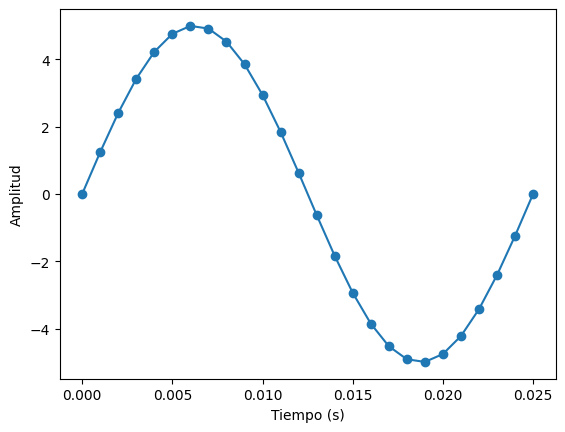

In [2]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal

Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


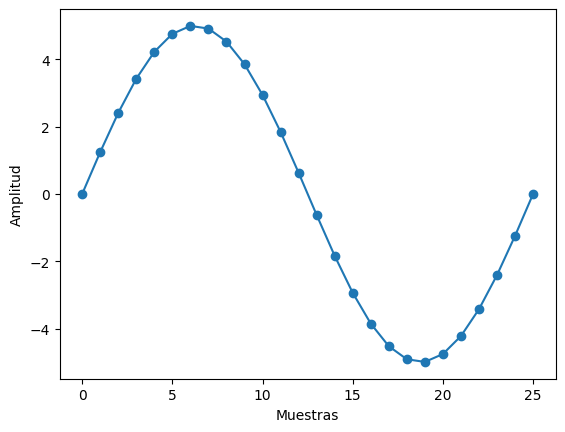

In [3]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

*A) Compruebe que los valores de las primeras cinco muestras son los mismos*


In [4]:
print("Valores de las primeras cinco muestras:")
print("x(t):", x[:5])
print("x1(n):", x1[:5])

Valores de las primeras cinco muestras:
x(t): [0.         1.24344944 2.40876837 3.42273553 4.22163963]
x1(n): [0.         1.24344944 2.40876837 3.42273553 4.22163963]


Se puede observar que los valores de las primeras 5 muestras son iguales a pesar de que la primera muestra es en el tiempo, y la segunda muestra es discreta, esto se da por el sobremuestreo el cual se elije una frecuencia de muestreo mayor a la de Nyquist, la cual dice que, la frecuencia de muestreo de Nyquist es la muestra mínima que se debe tomar para la señal, sin embargo, cuando tomo una frecuencia más alta de lo calculado anteriormente al cambiar una señal continua a discreta se da un sobremuestreo [1] que me permite que siga capturando suficiente de la señal original.

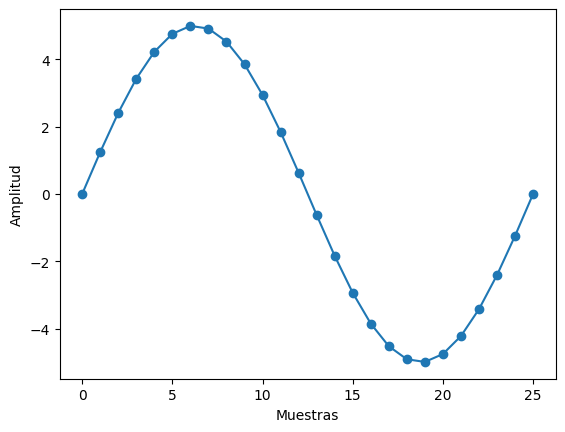

In [5]:
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

***Energía y potencia en el dominio del tiempo***

In [6]:
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)
print("energia10:", energia10)
print("potencia10:", potencia10)
print("rms10:", rms10)

energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
print("energia:", energia)
print("potencia:", potencia)
print("rms:", rms)

energia10: 3125.0000000000014
potencia10: 12.500000000000005
rms10: 3.535533905932738
energia: 312.50000000000006
potencia: 12.500000000000002
rms: 3.5355339059327378


*B) La potencia es la misma que en 𝑥(𝑛). ¿Por qué?*

Se tiene que tanto la señal x como x10 comparten la misma forma de onda sinusoidal, diferenciándose únicamente por los ciclos de la señal. Al calcular la energía y dividirla por el número total de puntos de la señal, obtenemos una estimación de la potencia promedio de la señal.

Por lo tanto, la potencia es igual, debido a que están basadas en la misma forma de onda y es una señal periodica, además solo difieren en los ciclos.

***Aplicaciones***

***Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40,
80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal,
y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.***

In [7]:

f=[40,80,160]

x=max(f)
f_min=2*x
print('la frecuencia mínima por Nyquist es:',f_min)

la frecuencia mínima por Nyquist es: 320


La frecuencia de muestreo mínima según el teorema de Nyquist es de 320 Hz como se muestra, sin embargo, para una mejor visualización no tomamos la mínima, sino una más alta, en este caso se tomará una frecuencia diferente por cada gráfica para suavizar su visualización.

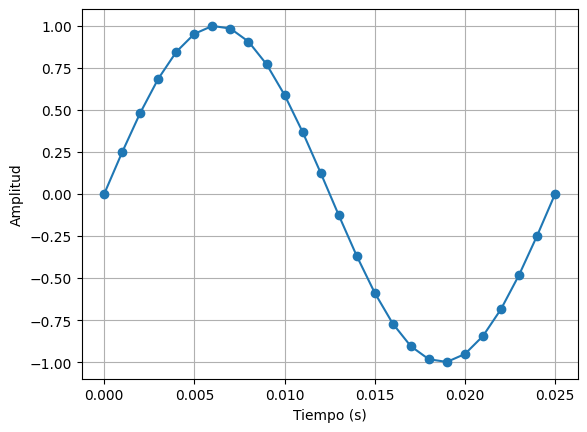

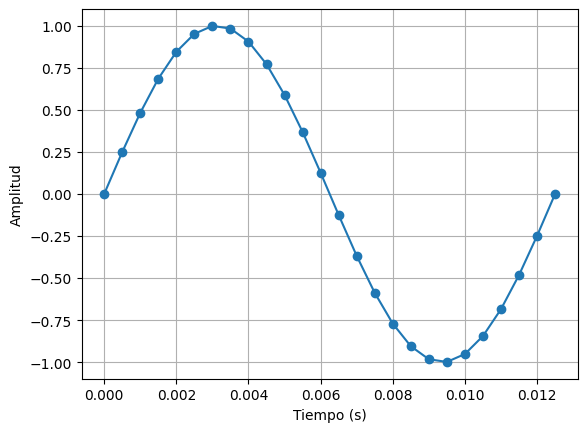

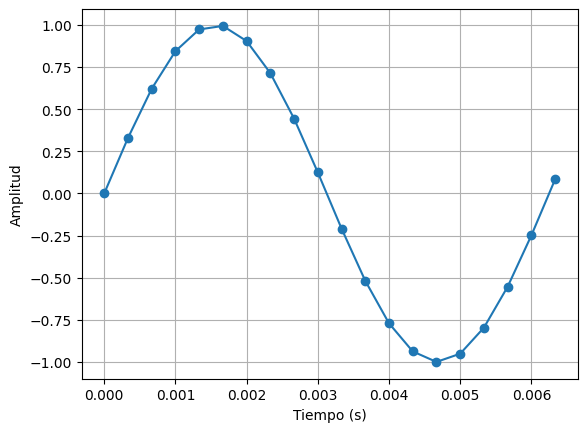

In [8]:

Fo = 40
Tp = 1/Fo
Fs = 1000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 1
x1 = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x1, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Fo = 80
Tp = 1/Fo
Fs = 2000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 1
x2 = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x2, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Fo = 160
Tp = 1/Fo
Fs = 3000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 1
Fo = 160
x3 = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x3, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Los periodos de muestreo son diferentes en las 3 gráficas, ya que se busca mayor cantidad de muestras por unidad de tiempo para que la gráfica se suavice en el caso de frecuencias más altas.

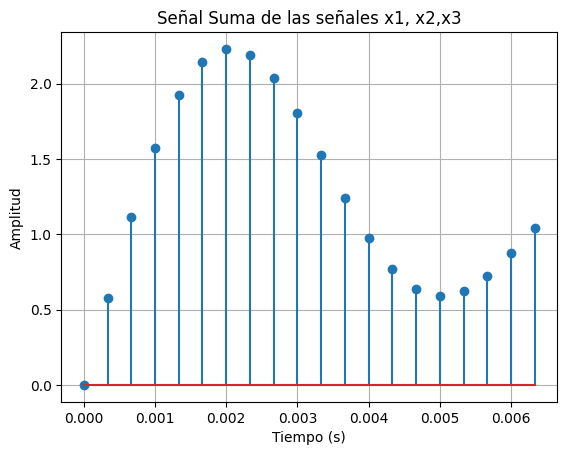

In [9]:
f = [40, 80, 160]

A = 1
x1 = A * np.sin(2 * np.pi * f[0] * t)
x2 = A * np.sin(2 * np.pi * f[1] * t)
x3 = A * np.sin(2 * np.pi * f[2] * t)

signal = x1 + x2 + x3

plt.stem(t, signal)
plt.title('Señal Suma de las señales x1, x2,x3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


***Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos
de la señal).***

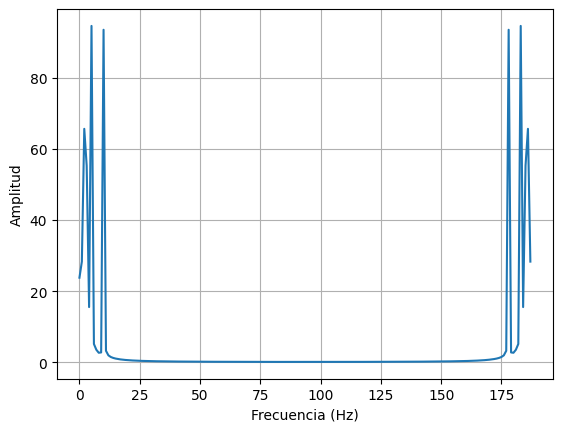

In [10]:
f = [40, 80, 160]
Tp = 10 / 160
Fs = 3000
T = 1 / Fs
t = np.arange(0, Tp, T)
A = 1
x1 = A * np.sin(2 * np.pi * f[0] * t)
x2 = A * np.sin(2 * np.pi * f[1] * t)
x3 = A * np.sin(2 * np.pi * f[2] * t)

signal10 = x1 + x2 + x3

f_signal = np.fft.fft(signal10)

plt.plot(abs(f_signal))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

***Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.
Aplíquelo a la señal anterior.***

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


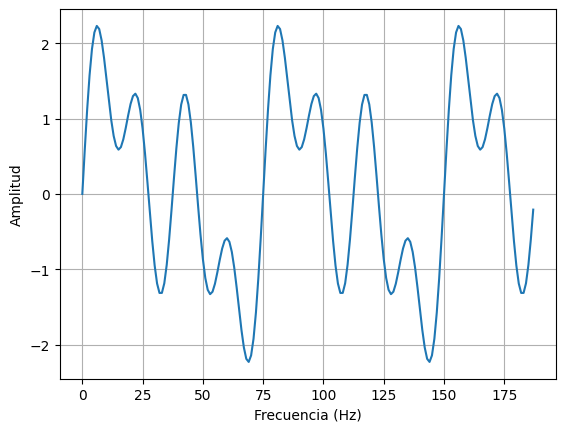

In [11]:

signal_reconstructed = np.fft.ifft(f_signal)
plt.plot(signal_reconstructed)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

.ifft(fft(a)): Esta función calcula la inversa de la transformada de Fourier discreta unidimensional de n puntos calculada por fft. En otras palabras, con precisión numérica.[2]

***¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?***

<ipython-input-13-f3160da9f6b3>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13];#aplica un rango especifico de frecuencias descartando las demás frecuencias


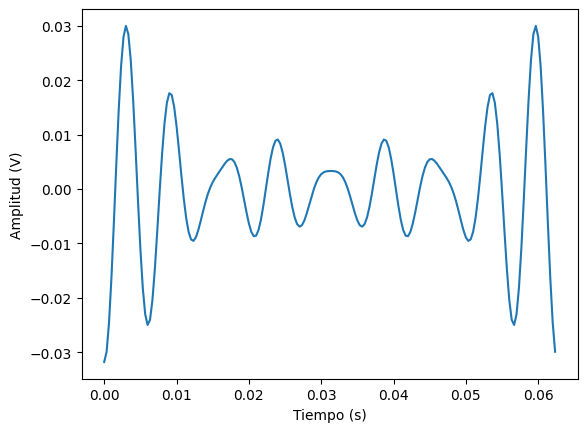

In [13]:
F1 = np.fft.fft(x1); #se le aplica la transformada de fourier para la señal x
F2 = np.zeros((len(F1)));# se crea un arreglo de ceros que sea igual al tamaño de x
F2[9:13] = F1[9:13];#aplica un rango especifico de frecuencias descartando las demás frecuencias
xr = np.fft.ifft(F2);#Se realiza la transformada inversa de Fourier de F2 utilizando la función ifft del módulo numpy.fft, lo que nos devuelve la señal filtrada en el dominio del tiempo
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()# esta parte es para mostrar la señal filtrada.

Lo que se puede deducir del código es que es un filtro pasa bandas, debido a que permite pasar ciertas frecuencias en un rango que ya se especifica en el código, las demás señales se atenuan o se eliminan.

***El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)***

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


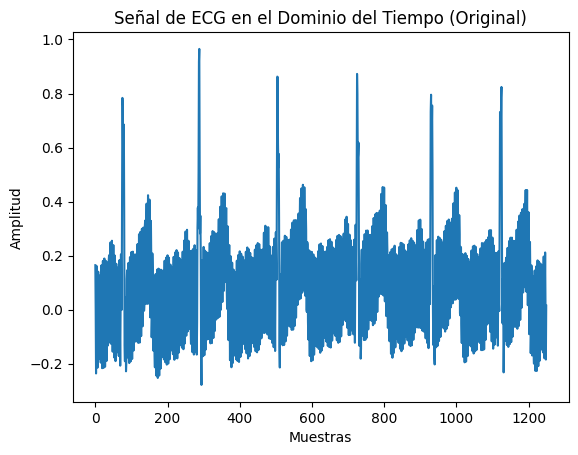

In [36]:
drive.mount('/content/drive')

# Cargar el archivo .mat
data = sio.loadmat('/content/drive/MyDrive/senecg.mat')
ecg_signal = data['ECG']  # Acceder a la señal de ECG utilizando la clave 'ECG'

# Definir la frecuencia de muestreo
fs = 250  # Frecuencia de muestreo en Hz


plt.figure()
plt.plot(ecg_signal)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal de ECG en el Dominio del Tiempo (Original)')
plt.show()


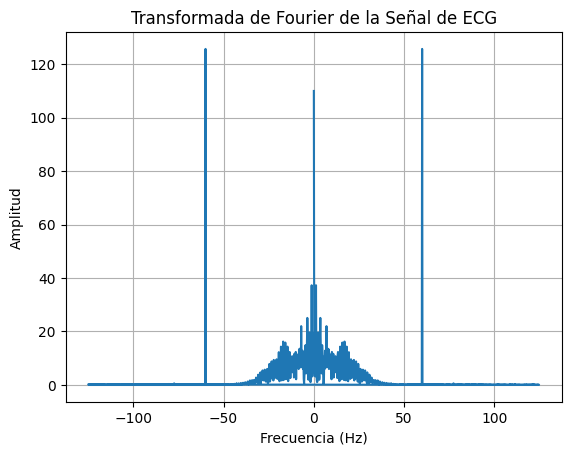

In [37]:
ecg_fourier = np.fft.fft(ecg_signal.flatten())
frequencies = np.fft.fftfreq(len(ecg_fourier), 1/fs)

plt.figure()
plt.plot(frequencies, np.abs(ecg_fourier))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de la Señal de ECG')
plt.grid(True)
plt.show()

(1250, 1)


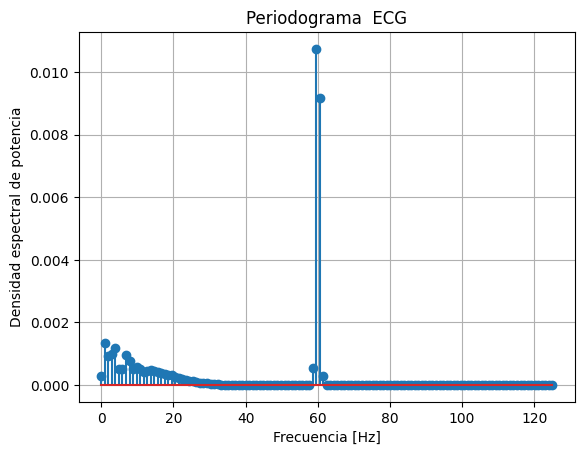

In [44]:
from scipy.signal import welch
nperseg = 256
noverlap = int(nperseg // 2)
print(ecg_signal.shape)

f, Pxx = welch(ecg_signal.ravel(), fs, 'hann', nperseg, noverlap)


plt.stem(f,Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma  ECG')
plt.grid()
plt.show()

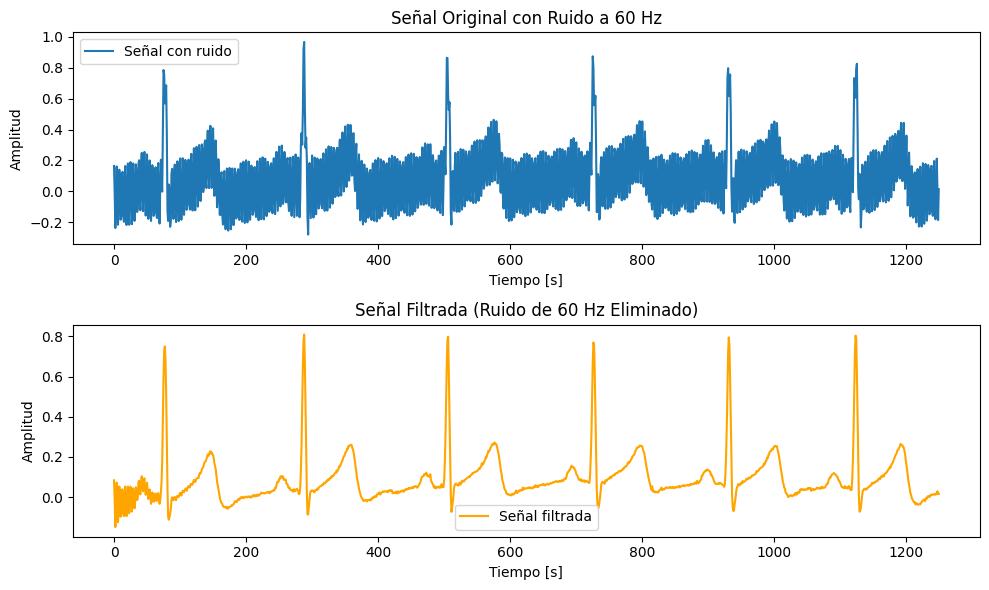

In [41]:
fs = 250  # Frecuencia de muestreo en Hz
f0 = 60    # Frecuencia del ruido en Hz que queremos filtrar
Q = 30     # Factor de calidad (ajusta el ancho de la banda de rechazo)

# Diseña el filtro Notch
b, a = signal.iirnotch(f0, Q, fs)

# Genera una señal de ejemplo con ruido de 60 Hz
signal_original = ecg_signal.ravel()

# Aplica el filtro Notch
signal_filtrada = signal.filtfilt(b, a, signal_original)

# Grafica la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal_original, label="Señal con ruido")
plt.title("Señal Original con Ruido a 60 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(signal_filtrada, label="Señal filtrada", color='orange')
plt.title("Señal Filtrada (Ruido de 60 Hz Eliminado)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()

plt.tight_layout()
plt.show()

(1250, 1)


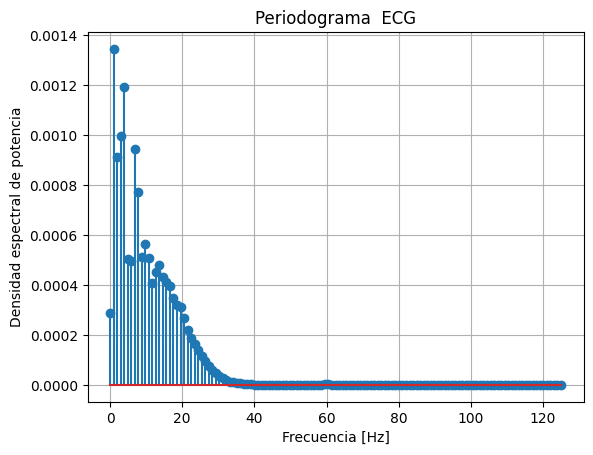

In [43]:
from scipy.signal import welch
nperseg = 256
noverlap = int(nperseg // 2)
print(ecg_signal.shape)

f, Pxx = welch(signal_filtrada, fs, 'hann', nperseg, noverlap)


plt.stem(f,Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma  ECG')
plt.grid()
plt.show()


Para realizar el método de Welch en la señal ECG se utiliza una ventana Hanning la cual se le suele denominar también ventana de coseno elevado.Esta ventana suaviza los extremos a cero y mejora su resolución en frecuencia.[3] El tamaño de la ventana se escogio de 256 esto porque queremos una ventana lo suficientemente ancha para poder distinguir las variaciones, sin embargo no debe ser demasiado ancha ya que esto puede generar una mal resolución temporal de la señal, por lo tanto es lo suficientemente grande para observar los datos sin verlos comprometidos.

El solapamiento se elije del 50% que significa que cada segmento se siperpone con el anterior en la mitad para poder observar el espectro de mejor forma al aumentar la cantidad de muestras para el promedio.

Se evidencia que la frecuencia predominante está a 60 Hz lo cual corresponde al ruido de la red electrica, se hace uso de un filtro iirnotch para eliminar el ruido y poder apreciar el periodograma de Welch con las frecuencias naturales de la señal predominando en la densidad de energía.

***Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG
de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto
1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al
azar. Realice un análisis comparativo de las señales según lo que le indiquen los
periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el
ancho de la ventaja)***

In [17]:
names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']
Control=pd.read_csv('/content/drive/MyDrive/Proyecto1_Biosenales/Datos_Marcha/Control/control8.ts',delimiter='\t',names=names)
Parkinson=datos = pd.read_csv('/content/drive/MyDrive/Proyecto1_Biosenales/Datos_Marcha/Parkinson/park8.ts',delimiter='\t',names=names)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
tiempo = datos['Elapsed Time (sec)'].values
left_int_control=Control['Left Stride Interval (sec)'].values
left_int_park=Parkinson['Left Stride Interval (sec)'].values



In [25]:
fs = 1 / np.mean(np.diff(tiempo))
print(fs)
print(left_int_control.shape)

0.7302349440556887
(261,)


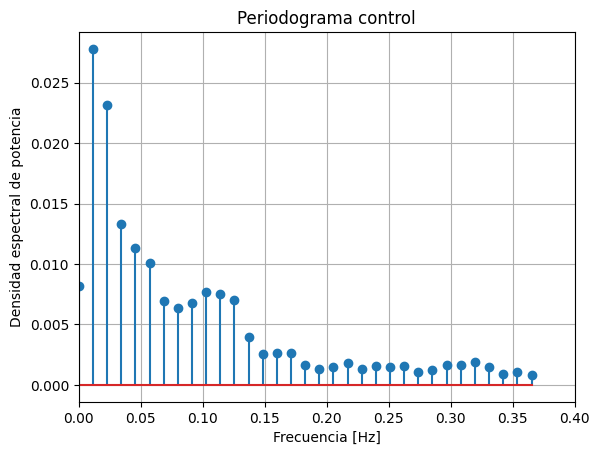

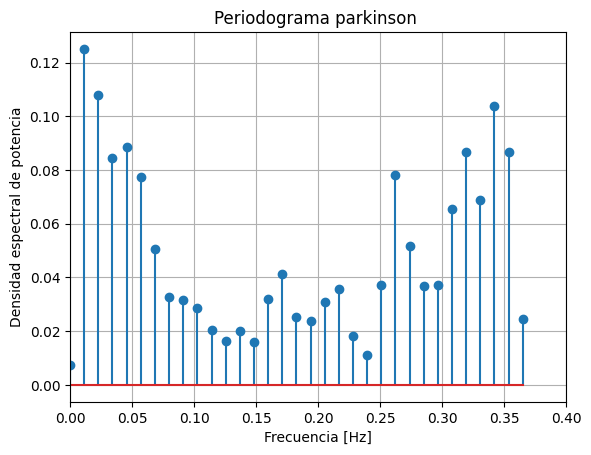

In [33]:
import matplotlib.pyplot as plt
from scipy.signal import welch

nperseg = 64
noverlap = int(nperseg / 2)

f_sano, P_control = welch(left_int_control.ravel(), fs, 'hann', nperseg, noverlap)

plt.stem(f_sano, P_control)
plt.xlim([0, 0.4])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma control')
plt.grid()
plt.show()

f_parkinson, P_parkinson = welch(left_int_park.ravel(), fs, 'hann', nperseg, noverlap)

plt.stem(f_parkinson, P_parkinson)
plt.xlim([0, 0.4])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma parkinson ')
plt.grid()
plt.show()

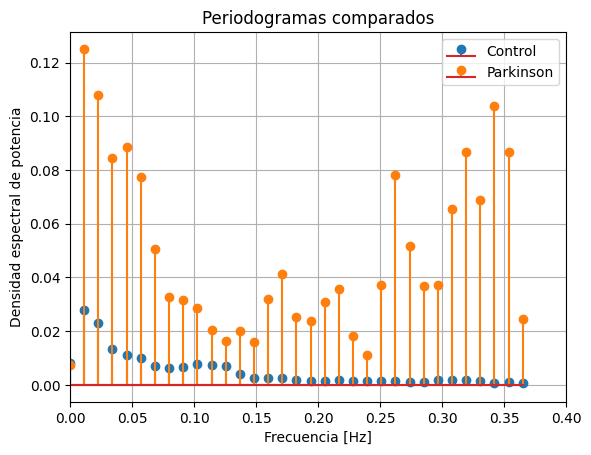

In [34]:
plt.stem(f_sano, P_control, label='Control')

plt.stem(f_parkinson, P_parkinson, linefmt='C1-', markerfmt='C1o', label='Parkinson')

plt.xlim([0, 0.4])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodogramas comparados')
plt.grid(True)
plt.legend()
plt.show()



En este caso el análisis se realiza no en señales de ECG, sino en señales de patrón de marcha. Fueron tomados 2 sujetos al azar entre los grupos de control y parkinson, y se utilizaron las señales de intervalo izquierdo (las cuales presentaron varianza significativa en los análisis hechos en el proyecto 1).

Se utilizo un ancho de ventana mucho más bajo y un solapamiento igual al que se viene utilizando de un 50% debido a lo bajas que son las frecuencias determinantes para estas señales en comparación a una señal de ECG. Con una ventana más amplia y mayor solapamiento se obtienen demasiados puntos en rangos de frecuencia muy pequeños.

Se puede observar un comportamiento muy distinto en el periodograma de ambos sujetos. Además de la evidente diferencia en la amplitud de la densidad de potencia, se evidencia que parea el paciente control las frecuencias iniciales contienen la mayor parte de la energía y sucede un decrecimiento, por el contrario en el caso del paciente con Parkinson podemos apreciar una forma concava con alta energía en las frecuencias iniciales pero también en las finales acercandose a 0.4 Hz

***Conclusiones***

Aplicar el método de Welch a la señal nos sirve para suavizar los segmentos y reducir los artefactos que se puedan dar por discontinuidad de la señal, por otro lado, nos permite obsercar como cambia la potencia de la señal a lo largo del tiempo, es decir, con este método obtenemos una versión más detallada de como varia la potencia de la señal en el tiempo, permitiendonos un mejor análisis espectral.

En cuanto a la transformada de fourier se puede observar que al pasar la señal al dominio de la frecuencia se puede eliminar o atenuar ruidos por medio de filtrados, proporciona información sobre la distribución de frecuencias en la señal. Por otro lado La Transformada Inversa de Fourier es el proceso inverso de la Transformada de Fourier. Mientras que la transformada de fourier toma una señal en el dominio del tiempo y la descompone en sus componentes de frecuencia, la transformada inversa de fourier toma una señal en el dominio de la frecuencia y la reconstruye en el dominio del tiempo.

***Referencias***

[1] Jacobus Manfred Fecht, E.-C. (s.f.). Teorema del muestreo, y transformadas de Fourier continua y discreta, con aplicaciones. webs.um.es. https://webs.um.es/gustavo.garrigos/tfg/Fecht_julio2018.pdf

[2]numpy.fft.ifft — NumPy v1.26 Manual. (s.f.). NumPy -. https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html

[3]GT, F. (s.f.). Ventanas de Hamming | PDF | Transformada rápida de Fourier | Áreas de informática. Scribd. https://es.scribd.com/document/358481883/Ventanas-de-Hamming